<a href="https://colab.research.google.com/github/sarkar2527/DSAP/blob/main/Pregnant_SMOTE_KNNIMPUTE_FS_MC_OL_CAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Importing the neccessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [4]:
# Read the Training Data
train_data = pd.read_csv("/content/drive/MyDrive/GeekLurn_ML_Session/Proj2_Train.csv")

# Read the test Data
test_data = pd.read_csv("/content/drive/MyDrive/GeekLurn_ML_Session/Proj2_Test.csv")

train_data.shape,test_data.shape

((1000, 16), (100, 15))

In [5]:
df = pd.concat([train_data,test_data],axis = 0)

df.shape

(1100, 16)

In [6]:

#Removing Unnecessary Features
df.drop(['Sl No','Sample ID','Unnamed: 15','Consistency_Score'], axis = 1, inplace = True)

In [7]:
df.isnull().sum()

Age                     0
Ob_Score                0
BMI                     0
Position_Score          0
Effacement_Score        0
Dialation_Score         0
Station_Score           0
Total_Bishop_Score      0
Cerv_Len_cms          660
Cerv_Wid_cms          660
Induction               0
Del_mode                0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Ob_Score'] = le.fit_transform(df['Ob_Score'])

In [9]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [10]:
df.isnull().sum()

Age                   0
Ob_Score              0
BMI                   0
Position_Score        0
Effacement_Score      0
Dialation_Score       0
Station_Score         0
Total_Bishop_Score    0
Cerv_Len_cms          0
Cerv_Wid_cms          0
Induction             0
Del_mode              0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


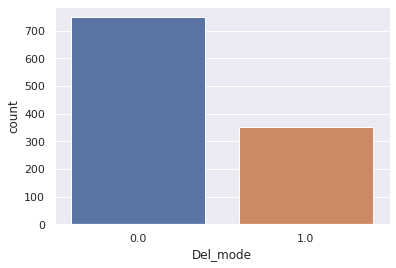

In [11]:
sns.countplot(df['Del_mode'])

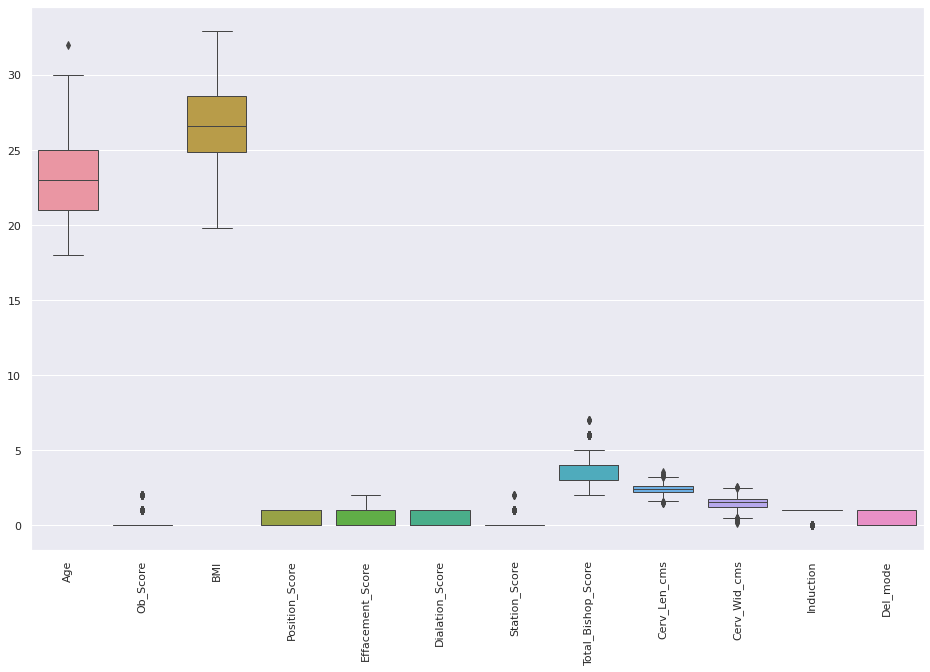

In [12]:
fig = plt.figure(figsize =(16, 10))
sns.boxplot(data= df, linewidth=1)
plt.xticks(rotation='vertical')
plt.show()

In [13]:
def outliers (df , ft) :
    Q1= df[ft].quantile(0.25)
    Q3= df[ft].quantile(0.75)
    
    IQR = Q3-Q1
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    ls = df.index[(df[ft] < lower_bound )| (df[ft] > upper_bound )]
    
    return ls

In [14]:
def remove (df, ls ):
    ls = sorted(set(ls))
    df = df.drop(ls)
    
    return df

In [15]:
index_list = []
for feature in [
 'Age',
 'Ob_Score',
 'BMI',
 'Position_Score',
 'Dialation_Score',
 'Station_Score',
 'Total_Bishop_Score',
 'Cerv_Len_cms',
 'Cerv_Wid_cms',
 'Induction',
 'Del_mode']:
    index_list.extend(outliers(df , feature))

In [16]:
df1 = remove(df,index_list)

In [17]:
df1.shape

(732, 12)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


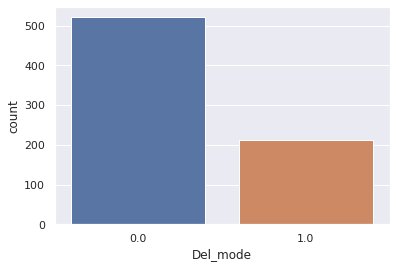

In [18]:
sns.countplot(df1['Del_mode'])

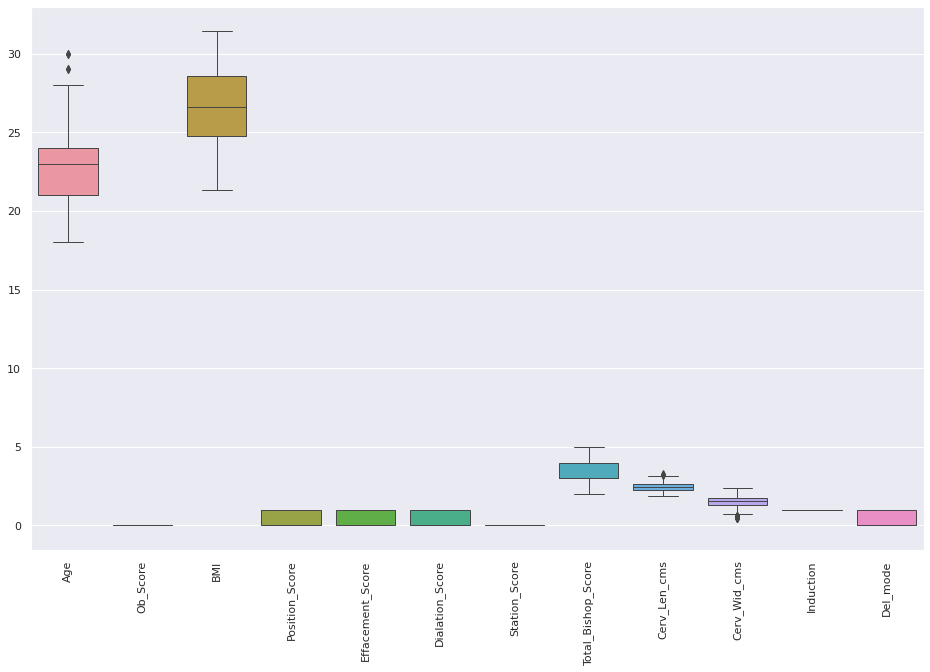

In [19]:
fig = plt.figure(figsize =(16, 10))
sns.boxplot(data= df1, linewidth=1)
plt.xticks(rotation='vertical')
plt.show()

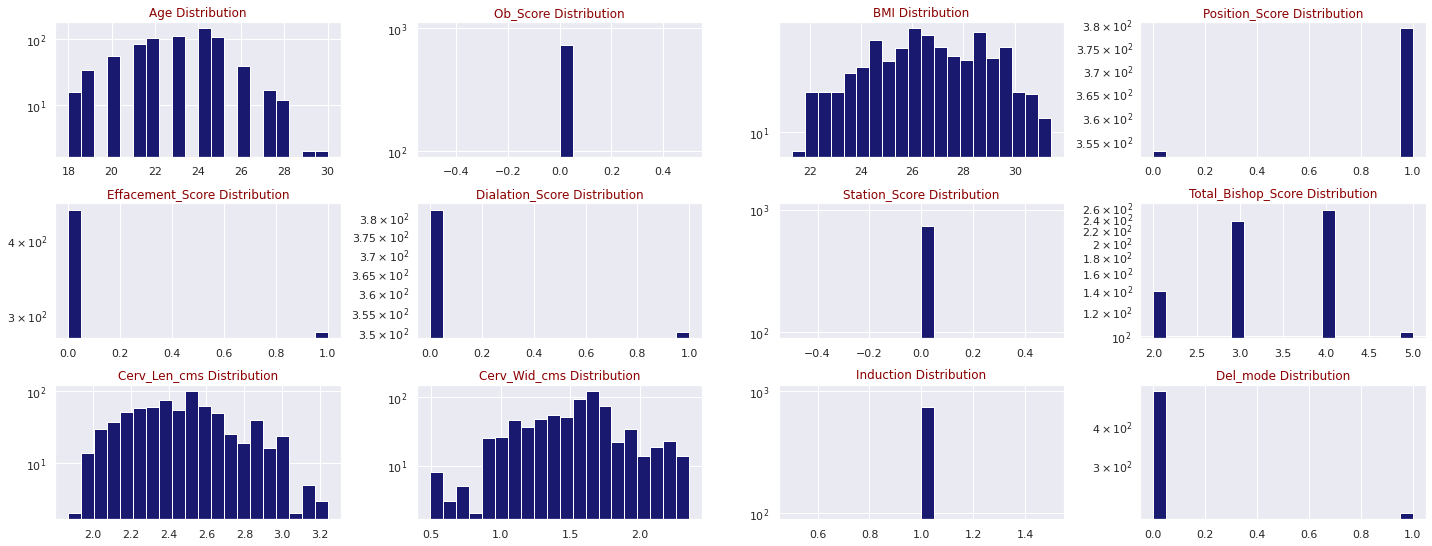

In [20]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()

draw_histograms(df1,df1.columns,8,4)

In [21]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,732.0,22.965847,2.206862,18.000000,21.000000,23.000000,24.000000,30.000000
Ob_Score,732.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BMI,732.0,26.605294,2.350415,21.300000,24.769010,26.584167,28.602236,31.415765
Position_Score,732.0,0.517760,0.500026,0.000000,0.000000,1.000000,1.000000,1.000000
Effacement_Score,732.0,0.383880,0.486662,0.000000,0.000000,0.000000,1.000000,1.000000
Dialation_Score,732.0,0.478142,0.499864,0.000000,0.000000,0.000000,1.000000,1.000000
Station_Score,732.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Total_Bishop_Score,732.0,3.438525,0.954673,2.000000,3.000000,3.000000,4.000000,5.000000
Cerv_Len_cms,732.0,2.466463,0.264258,1.870000,2.257082,2.462970,2.620523,3.239984
Cerv_Wid_cms,732.0,1.525365,0.352153,0.493955,1.285786,1.565271,1.717773,2.350850


In [22]:
df1['Del_mode'].value_counts()

0.0    521
1.0    211
Name: Del_mode, dtype: int64

In [23]:
#### Independent and Dependent Features
#X=df1.drop("Del_mode",axis=1)
#=df1['Del_mode']

**Feature Selection**

In [24]:
#Select K best

X=df1.drop("Del_mode",axis=1)
Y=df1['Del_mode']

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

Select_KBest_rank_features=SelectKBest(score_func=chi2,k=5)
KBest_features=Select_KBest_rank_features.fit(X,Y)

df_Kscores=pd.DataFrame(KBest_features.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

kbest_features_rank=pd.concat([dfcolumns,df_Kscores],axis=1)

kbest_features_rank.columns=['Features','K_score']
kbest_features_rank

print(kbest_features_rank.nlargest(6,'K_score'))

             Features    K_score
3      Position_Score  24.053602
0                 Age  18.382231
4    Effacement_Score   6.260953
5     Dialation_Score   6.207169
7  Total_Bishop_Score   4.944186
9        Cerv_Wid_cms   3.990352


[0.18519355 0.         0.2342404  0.06488788 0.03829096 0.05429935
 0.         0.07988119 0.16074116 0.18246551 0.        ]


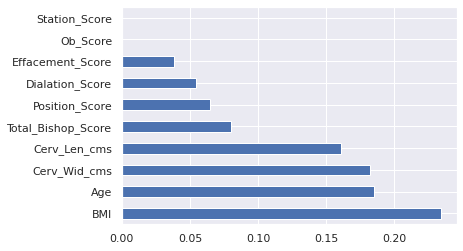

,Features,Score
2,BMI,0.234240
0,Age,0.185194
9,Cerv_Wid_cms,0.182466
8,Cerv_Len_cms,0.160741
7,Total_Bishop_Score,0.079881
3,Position_Score,0.064888


In [25]:
from sklearn.ensemble import ExtraTreesClassifier
ET_model=ExtraTreesClassifier()
ET_model.fit(X,Y)

print(ET_model.feature_importances_)

import matplotlib.pyplot as plt
ET_ranked_features=pd.Series(ET_model.feature_importances_,index=X.columns)
ET_ranked_features.nlargest(10).plot(kind='barh')
plt.show()


df_ET_rank =pd.DataFrame(ET_model.feature_importances_)

dfcolumns=pd.DataFrame(X.columns)

ET_features_rank=pd.concat([dfcolumns,df_ET_rank],axis=1)

ET_features_rank.columns=['Features','Score']
ET_features_rank
ET_features_rank.nlargest(6,'Score')

Cerv_Wid_cms          0.202686
Cerv_Len_cms          0.192660
BMI                   0.157632
Age                   0.053333
Total_Bishop_Score    0.045699
Position_Score        0.029403
dtype: float64


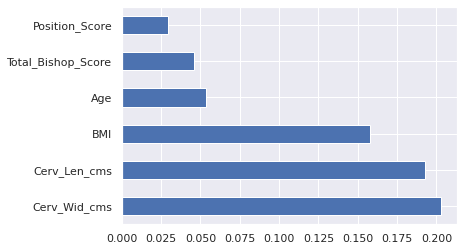

In [26]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(X,Y)

mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

print(mutual_data.nlargest(6))

mutual_data.nlargest(6).plot(kind='barh')
plt.show()

In [27]:
X.corr()

,Age,Ob_Score,BMI,Position_Score,Effacement_Score,Dialation_Score,Station_Score,Total_Bishop_Score,Cerv_Len_cms,Cerv_Wid_cms,Induction
Age,1.000000,NaN,0.123797,0.169769,0.101386,-0.121587,NaN,0.116852,0.349887,-0.067838,NaN
Ob_Score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BMI,0.123797,NaN,1.000000,-0.272309,-0.091017,-0.040565,NaN,-0.143398,0.003799,0.089321,NaN
Position_Score,0.169769,NaN,-0.272309,1.000000,0.306433,0.069970,NaN,0.604094,-0.055794,0.066978,NaN
Effacement_Score,0.101386,NaN,-0.091017,0.306433,1.000000,0.211679,NaN,0.667721,-0.454967,0.224209,NaN
Dialation_Score,-0.121587,NaN,-0.040565,0.069970,0.211679,1.000000,NaN,0.560480,-0.248567,0.157385,NaN
Station_Score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Bishop_Score,0.116852,NaN,-0.143398,0.604094,0.667721,0.560480,NaN,1.000000,-0.398518,0.200704,NaN
Cerv_Len_cms,0.349887,NaN,0.003799,-0.055794,-0.454967,-0.248567,NaN,-0.398518,1.000000,-0.123929,NaN
Cerv_Wid_cms,-0.067838,NaN,0.089321,0.066978,0.224209,0.157385,NaN,0.200704,-0.123929,1.000000,NaN


In [28]:
threshold=0.2

# find and remove correlated features
def correlation(df1, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df1.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [29]:
correlation(df1.iloc[:,:-1],threshold)

{'Cerv_Len_cms',
 'Cerv_Wid_cms',
 'Dialation_Score',
 'Effacement_Score',
 'Position_Score',
 'Total_Bishop_Score'}

**Multicolinearity**

In [30]:
VIF = []
from statsmodels.stats.outliers_influence import variance_inflation_factor
for j in range(X.shape[1]):
    VIF.append(variance_inflation_factor(X.values,j))
print(VIF)

import numpy as np
np.transpose(VIF)
pd.DataFrame(X.columns)
pd.DataFrame(np.transpose(VIF))
pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(VIF))], axis =1)

[1.4215549581314992, nan, 1.1538938669386343, 2.2903059654707376, 2.354597744569187, 2.1172292927418987, nan, 5.504588225292283, 1.7243162197534139, 1.097047737744582, 339.15059230837716]


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,0,0
0,Age,1.421555
1,Ob_Score,NaN
2,BMI,1.153894
3,Position_Score,2.290306
4,Effacement_Score,2.354598
5,Dialation_Score,2.117229
6,Station_Score,NaN
7,Total_Bishop_Score,5.504588
8,Cerv_Len_cms,1.724316
9,Cerv_Wid_cms,1.097048


After applying Multiple feature selection techniques and Multicolinearity, we can use the below features for our analysis:

Age, BMI, Cerv_Len_cms, Cerv_Wid_cms, Position_Score

In [31]:
X=df1[['Age', 'BMI', 'Cerv_Len_cms', 'Cerv_Wid_cms', 'Position_Score']]
Y=df1['Del_mode']

In [32]:
# Scaling the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scale = sc.fit_transform(X)

In [33]:
# Train and Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x_scale,Y,test_size = 0.3, random_state=0,stratify=Y)

In [34]:
X_train.shape ,X_test.shape ,Y_train.shape,Y_test.shape

((512, 5), (220, 5), (512,), (220,))

In [35]:
"""**SMOTE Sampling**"""
from collections import Counter
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_SM, Y_train_SM = sm.fit_resample(X_train, Y_train)

print("The number of classes before fit {}".format(Counter(Y_train)))
print("The number of classes after fit {}".format(Counter(Y_train_SM)))

The number of classes before fit Counter({0.0: 364, 1.0: 148})
The number of classes after fit Counter({1.0: 364, 0.0: 364})


In [36]:
"""**Logistic Regression with SMOTE Sampling**"""

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
logreg = LogisticRegression()
logreg.fit(X_train_SM,Y_train_SM)
y_pred_lr_SM = logreg.predict(X_test)

print(confusion_matrix(Y_test,y_pred_lr_SM))
print(accuracy_score(Y_test,y_pred_lr_SM))
print(classification_report(Y_test,y_pred_lr_SM))

[[116  41]
 [ 14  49]]
0.75
              precision    recall  f1-score   support

         0.0       0.89      0.74      0.81       157
         1.0       0.54      0.78      0.64        63

    accuracy                           0.75       220
   macro avg       0.72      0.76      0.72       220
weighted avg       0.79      0.75      0.76       220



In [37]:
"""**KNN with SMOTE sampling**"""

from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=1, p=2) 
knn_clf.fit(X_train_SM,Y_train_SM)
Y_pred_knn_SM = knn_clf.predict(X_test)

print(confusion_matrix(Y_test,Y_pred_knn_SM))
print(accuracy_score(Y_test,Y_pred_knn_SM))
print(classification_report(Y_test,Y_pred_knn_SM))


[[144  13]
 [ 14  49]]
0.8772727272727273
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.91       157
         1.0       0.79      0.78      0.78        63

    accuracy                           0.88       220
   macro avg       0.85      0.85      0.85       220
weighted avg       0.88      0.88      0.88       220



In [38]:
kn_score1 = []
neighbors = range(1,20)

for i in neighbors:
        knn_clf = KNeighborsClassifier(n_neighbors=i, p=2)
        knn_clf.fit(X_train_SM,Y_train_SM)
        Y_pred_knn_SM = knn_clf.predict(X_test)
        kn_score1.append(accuracy_score(Y_test,Y_pred_knn_SM))

print(kn_score1)

[0.8772727272727273, 0.8818181818181818, 0.8863636363636364, 0.8772727272727273, 0.8636363636363636, 0.8636363636363636, 0.8454545454545455, 0.85, 0.8409090909090909, 0.8318181818181818, 0.8227272727272728, 0.8272727272727273, 0.8090909090909091, 0.8090909090909091, 0.8, 0.8090909090909091, 0.7772727272727272, 0.7954545454545454, 0.7772727272727272]


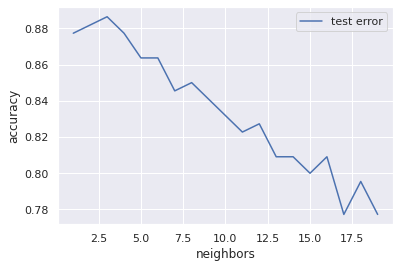

In [39]:
plt.plot(neighbors,kn_score1, label = "test error")
plt.ylabel("accuracy")
plt.xlabel("neighbors")
plt.legend()

In [40]:

"""**Support vector machine**"""

from sklearn.svm import SVC

svm = SVC(kernel = "linear", gamma = "auto")
svm.fit(X_train_SM,Y_train_SM)
Y_pred_svm_linear_SM = svm.predict(X_test)

print(confusion_matrix(Y_test,Y_pred_svm_linear_SM))
print(accuracy_score(Y_test,Y_pred_svm_linear_SM))
print(classification_report(Y_test,Y_pred_svm_linear_SM))

svm = SVC(kernel = "rbf", gamma = "auto")
svm.fit(X_train_SM,Y_train_SM)
Y_pred_svm_rbf_SM = svm.predict(X_test)

print(confusion_matrix(Y_test,Y_pred_svm_rbf_SM))
print(accuracy_score(Y_test,Y_pred_svm_rbf_SM))
print(classification_report(Y_test,Y_pred_svm_rbf_SM))

svm = SVC(kernel = "poly", gamma = "auto")
svm.fit(X_train_SM,Y_train_SM)
Y_pred_svm_poly_SM = svm.predict(X_test)

print(confusion_matrix(Y_test,Y_pred_svm_poly_SM))
print(accuracy_score(Y_test,Y_pred_svm_poly_SM))
print(classification_report(Y_test,Y_pred_svm_poly_SM))


[[117  40]
 [ 12  51]]
0.7636363636363637
              precision    recall  f1-score   support

         0.0       0.91      0.75      0.82       157
         1.0       0.56      0.81      0.66        63

    accuracy                           0.76       220
   macro avg       0.73      0.78      0.74       220
weighted avg       0.81      0.76      0.77       220

[[124  33]
 [  9  54]]
0.8090909090909091
              precision    recall  f1-score   support

         0.0       0.93      0.79      0.86       157
         1.0       0.62      0.86      0.72        63

    accuracy                           0.81       220
   macro avg       0.78      0.82      0.79       220
weighted avg       0.84      0.81      0.82       220

[[131  26]
 [ 10  53]]
0.8363636363636363
              precision    recall  f1-score   support

         0.0       0.93      0.83      0.88       157
         1.0       0.67      0.84      0.75        63

    accuracy                           0.84       220
  

In [41]:
###"""** Stocastic Gradient Classifier """**

from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(eta0 = 0.1011, max_iter = 50)
sgd.fit(X_train_SM,Y_train_SM)
Y_pred_sgd_SM = sgd.predict(X_test)

print(confusion_matrix(Y_test,Y_pred_sgd_SM))
print(accuracy_score(Y_test,Y_pred_sgd_SM))
print(classification_report(Y_test,Y_pred_sgd_SM))

[[129  28]
 [ 18  45]]
0.7909090909090909
              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85       157
         1.0       0.62      0.71      0.66        63

    accuracy                           0.79       220
   macro avg       0.75      0.77      0.76       220
weighted avg       0.80      0.79      0.80       220



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [42]:
sgd_score = []
setting = np.arange(0.101,0.102,0.0001)

for i in setting:
    sgd = SGDClassifier(eta0 = i, max_iter = 50)
    sgd.fit(X_train_SM,Y_train_SM)
    Y_pred_sgd_SM = sgd.predict(X_test)
    sgd_score.append(accuracy_score(Y_test,Y_pred_sgd_SM))
    
print(sgd_score)

[0.759090909090909, 0.6772727272727272, 0.6636363636363637, 0.7, 0.6318181818181818, 0.7181818181818181, 0.7363636363636363, 0.6772727272727272, 0.6727272727272727, 0.7454545454545455]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

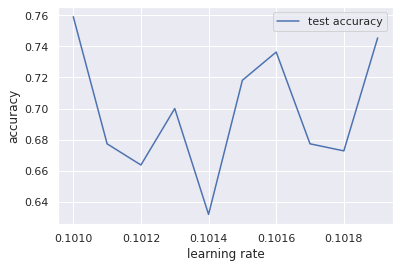

In [43]:
plt.plot(setting,sgd_score, label = "test accuracy")
plt.ylabel("accuracy")
plt.xlabel("learning rate")
plt.legend()

In [44]:
"""**Decision Tree classifier**"""

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = "gini", max_depth = 8)
dt.fit(X_train_SM,Y_train_SM)
Y_pred_dt_SM = dt.predict(X_test)

dt.tree_.node_count, dt.tree_.max_depth

print(confusion_matrix(Y_test,Y_pred_dt_SM))
print(accuracy_score(Y_test,Y_pred_dt_SM))
print(classification_report(Y_test,Y_pred_dt_SM))

[[137  20]
 [ 12  51]]
0.8545454545454545
              precision    recall  f1-score   support

         0.0       0.92      0.87      0.90       157
         1.0       0.72      0.81      0.76        63

    accuracy                           0.85       220
   macro avg       0.82      0.84      0.83       220
weighted avg       0.86      0.85      0.86       220



In [45]:
dt_score = []
md = range(1,14)
for i in md:
    dt = DecisionTreeClassifier(criterion = "gini", max_depth = i)
    dt.fit(X_train_SM,Y_train_SM)
    Y_pred_dt_SM = dt.predict(X_test)
    dt_score.append(accuracy_score(Y_test,Y_pred_dt_SM))

print(dt_score)

[0.7, 0.7454545454545455, 0.7090909090909091, 0.7636363636363637, 0.8090909090909091, 0.8545454545454545, 0.8454545454545455, 0.8545454545454545, 0.8636363636363636, 0.8590909090909091, 0.8636363636363636, 0.8727272727272727, 0.8727272727272727]


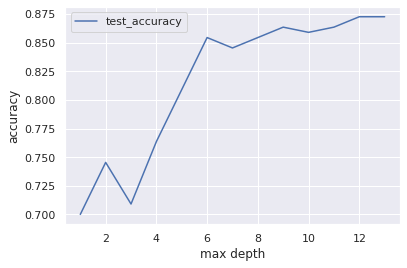

In [46]:
plt.plot(md,dt_score,label = "test_accuracy")
plt.ylabel("accuracy")
plt.xlabel("max depth")
plt.legend()

In [47]:
"""**BaggingClassifier**"""

from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(base_estimator = dt, max_samples = 0.6)
bag.fit(X_train_SM,Y_train_SM)
Y_pred_bag_SM = bag.predict(X_test)


print(confusion_matrix(Y_test,Y_pred_bag_SM))
print(accuracy_score(Y_test,Y_pred_bag_SM))
print(classification_report(Y_test,Y_pred_bag_SM))

[[147  10]
 [ 12  51]]
0.9
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       157
         1.0       0.84      0.81      0.82        63

    accuracy                           0.90       220
   macro avg       0.88      0.87      0.88       220
weighted avg       0.90      0.90      0.90       220



In [48]:
bag_score = []
ms = np.arange(0.1,1,0.1)
for i in ms:
    bag = BaggingClassifier(base_estimator = dt, max_samples = i)
    bag.fit(X_train_SM,Y_train_SM)
    Y_pred_bag_SM = bag.predict(X_test)
    bag_score.append(accuracy_score(Y_test,Y_pred_bag_SM))
    
print(bag_score)

[0.8590909090909091, 0.9, 0.8863636363636364, 0.9090909090909091, 0.9, 0.9136363636363637, 0.9136363636363637, 0.9090909090909091, 0.9]


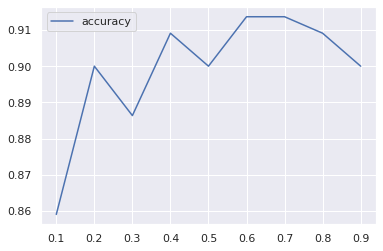

In [49]:
plt.plot(ms,bag_score,label = "accuracy")
plt.legend()

In [50]:
###Random Forest Classifier**

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_features = 0.2, n_estimators = 38)
RF.fit(X_train_SM,Y_train_SM)
Y_pred_rf_SM = RF.predict(X_test)

print(confusion_matrix(Y_test,Y_pred_rf_SM))
print(accuracy_score(Y_test,Y_pred_rf_SM))
print(classification_report(Y_test,Y_pred_rf_SM))

[[147  10]
 [  9  54]]
0.9136363636363637
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       157
         1.0       0.84      0.86      0.85        63

    accuracy                           0.91       220
   macro avg       0.89      0.90      0.89       220
weighted avg       0.91      0.91      0.91       220



In [51]:
rf_score = []
mf = np.arange(0.1,1,0.1)
for i in mf:
    RF = RandomForestClassifier(max_features = i, n_estimators = 38)
    RF.fit(X_train_SM,Y_train_SM)
    Y_pred_rf_SM = RF.predict(X_test)
    rf_score.append(accuracy_score(Y_test,Y_pred_rf_SM))
    
print(rf_score)

[0.9181818181818182, 0.8954545454545455, 0.9136363636363637, 0.9136363636363637, 0.9181818181818182, 0.9136363636363637, 0.9181818181818182, 0.9136363636363637, 0.9181818181818182]


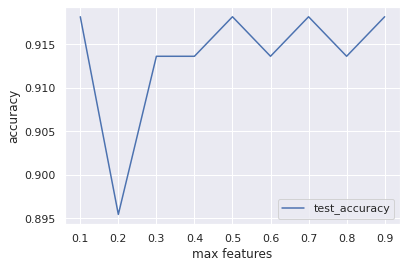

In [52]:
plt.plot(mf,rf_score,label = "test_accuracy")
plt.ylabel("accuracy")
plt.xlabel("max features")
plt.legend()

In [53]:
rf_score1 = []
est = range(30,40,1)
for i in est:
    
    RF = RandomForestClassifier(max_features = 0.1, n_estimators = i)
    RF.fit(X_train_SM,Y_train_SM)
    Y_pred_rf_SM = RF.predict(X_test)
    rf_score1.append(accuracy_score(Y_test,Y_pred_rf_SM))
    
print(rf_score1)

[0.9272727272727272, 0.9090909090909091, 0.9136363636363637, 0.9045454545454545, 0.9045454545454545, 0.9136363636363637, 0.9090909090909091, 0.9090909090909091, 0.9181818181818182, 0.9227272727272727]


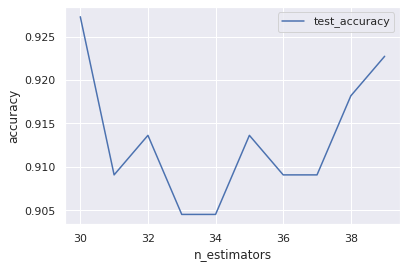

In [54]:
plt.plot(est,rf_score1,label = "test_accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_estimators")
plt.legend()


In [55]:
"""**Ada Boost Classifier**"""

from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier(base_estimator = dt, n_estimators = 40)
adb.fit(X_train_SM,Y_train_SM)
Y_pred_adb_SM = adb.predict(X_test)

print(confusion_matrix(Y_test,Y_pred_adb_SM))
print(accuracy_score(Y_test,Y_pred_adb_SM))
print(classification_report(Y_test,Y_pred_adb_SM))


[[142  15]
 [ 13  50]]
0.8727272727272727
              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91       157
         1.0       0.77      0.79      0.78        63

    accuracy                           0.87       220
   macro avg       0.84      0.85      0.85       220
weighted avg       0.87      0.87      0.87       220



In [56]:
adb_score = []
est = range(1,100,10)
for i in est:
    adb = AdaBoostClassifier(base_estimator = dt, n_estimators = i)
    adb.fit(X_train_SM,Y_train_SM)
    Y_pred_adb_SM = adb.predict(X_test)
    adb_score.append(accuracy_score(Y_test,Y_pred_adb_SM))

print(adb_score)


[0.8772727272727273, 0.8818181818181818, 0.8772727272727273, 0.8727272727272727, 0.8772727272727273, 0.8772727272727273, 0.8772727272727273, 0.8727272727272727, 0.8772727272727273, 0.8772727272727273]


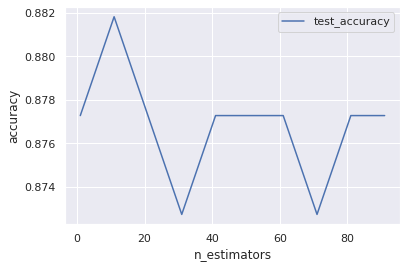

In [57]:
plt.plot(est,adb_score,label = "test_accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_estimators")
plt.legend()


In [58]:
##**Gradinet Boosting**

from sklearn.ensemble import GradientBoostingClassifier
gbr = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.195)
gbr.fit(X_train_SM,Y_train_SM)
Y_pred_gbr_SM = gbr.predict(X_test)

print(confusion_matrix(Y_test,Y_pred_gbr_SM))
print(accuracy_score(Y_test,Y_pred_gbr_SM))
print(classification_report(Y_test,Y_pred_gbr_SM))

[[143  14]
 [ 10  53]]
0.8909090909090909
              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92       157
         1.0       0.79      0.84      0.82        63

    accuracy                           0.89       220
   macro avg       0.86      0.88      0.87       220
weighted avg       0.89      0.89      0.89       220



In [59]:
gbr_score = []
setting = np.arange(0.01,0.2,0.01)
for i in setting:
    gbr = GradientBoostingClassifier(n_estimators = 100, learning_rate = i)
    gbr.fit(X_train_SM,Y_train_SM)
    Y_pred_gbr_SM = gbr.predict(X_test)
    gbr_score.append(accuracy_score(Y_test,Y_pred_gbr_SM))

print(gbr_score)

[0.8409090909090909, 0.8545454545454545, 0.8590909090909091, 0.85, 0.8590909090909091, 0.8590909090909091, 0.8636363636363636, 0.8681818181818182, 0.8863636363636364, 0.8818181818181818, 0.8818181818181818, 0.8727272727272727, 0.8818181818181818, 0.8818181818181818, 0.8863636363636364, 0.8818181818181818, 0.8863636363636364, 0.8909090909090909, 0.8954545454545455]


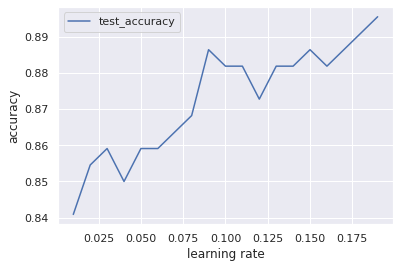

In [60]:
plt.plot(setting,gbr_score,label = "test_accuracy")
plt.ylabel("accuracy")
plt.xlabel("learning rate")
plt.legend()

In [61]:
##**XG Boost**


from xgboost import XGBClassifier
XG = XGBClassifier(learning_rate = 0.14, gamma = 0, reg_lambda = 1, n_estimators = 100)
XG.fit(X_train_SM,Y_train_SM)
Y_pred_XG_SM = XG.predict(X_test)

print(confusion_matrix(Y_test,Y_pred_XG_SM))
print(accuracy_score(Y_test,Y_pred_XG_SM))
print(classification_report(Y_test,Y_pred_XG_SM))


[[143  14]
 [ 11  52]]
0.8863636363636364
              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92       157
         1.0       0.79      0.83      0.81        63

    accuracy                           0.89       220
   macro avg       0.86      0.87      0.86       220
weighted avg       0.89      0.89      0.89       220



In [62]:
XG_score = []
est = range(1,100,10)
for i in est:
    XG = XGBClassifier(learning_rate = 0.14, gamma = 0, reg_lambda = 1, n_estimators = i)
    XG.fit(X_train_SM,Y_train_SM)
    Y_pred_XG_SM = XG.predict(X_test)
    XG_score.append(accuracy_score(Y_test,Y_pred_XG_SM))

print(XG_score)

[0.7045454545454546, 0.8409090909090909, 0.8545454545454545, 0.8590909090909091, 0.8590909090909091, 0.8636363636363636, 0.8636363636363636, 0.8772727272727273, 0.8818181818181818, 0.8818181818181818]


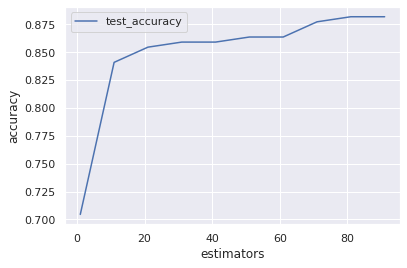

In [63]:
plt.plot(est,XG_score,label = "test_accuracy")
plt.ylabel("accuracy")
plt.xlabel("estimators")
plt.legend()

In [67]:
pip install catboost


     |████████████████████████████████| 76.6 MB 59 kB/s 


In [75]:
SEED = 1234

params = {'iterations':5000,
        'learning_rate':0.01,
        'depth':3,
        'eval_metric':'AUC',
        'verbose':200,
        'od_type':"Iter", # overfit detector
        'od_wait':500, # most recent best iteration to wait before stopping
        'random_seed': SEED
          }

from catboost import CatBoostClassifier 
cat_model = CatBoostClassifier(**params)
cat_model.fit(X_train_SM, Y_train_SM)
Y_pred_CAT_SM = cat_model.predict(X_test)

0:	total: 2.41ms	remaining: 12.1s
200:	total: 287ms	remaining: 6.84s
400:	total: 447ms	remaining: 5.12s
600:	total: 760ms	remaining: 5.57s
800:	total: 991ms	remaining: 5.2s
1000:	total: 1.27s	remaining: 5.06s
1200:	total: 1.56s	remaining: 4.93s
1400:	total: 1.73s	remaining: 4.44s
1600:	total: 2.07s	remaining: 4.39s
1800:	total: 2.24s	remaining: 3.98s
2000:	total: 2.4s	remaining: 3.6s
2200:	total: 2.66s	remaining: 3.39s
2400:	total: 2.96s	remaining: 3.2s
2600:	total: 3.26s	remaining: 3.01s
2800:	total: 3.5s	remaining: 2.75s
3000:	total: 3.71s	remaining: 2.47s
3200:	total: 4.04s	remaining: 2.27s
3400:	total: 4.21s	remaining: 1.98s
3600:	total: 4.4s	remaining: 1.71s
3800:	total: 4.54s	remaining: 1.43s
4000:	total: 4.7s	remaining: 1.17s
4200:	total: 4.94s	remaining: 940ms
4400:	total: 5.2s	remaining: 707ms
4600:	total: 5.38s	remaining: 466ms
4800:	total: 5.65s	remaining: 234ms
4999:	total: 5.94s	remaining: 0us


In [76]:
print(confusion_matrix(Y_test,Y_pred_CAT_SM))
print(accuracy_score(Y_test,Y_pred_CAT_SM))
print(classification_report(Y_test,Y_pred_CAT_SM))

[[148   9]
 [  9  54]]
0.9181818181818182
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       157
         1.0       0.86      0.86      0.86        63

    accuracy                           0.92       220
   macro avg       0.90      0.90      0.90       220
weighted avg       0.92      0.92      0.92       220



In [74]:
print('Acc_XG_SM:', accuracy_score(Y_test,Y_pred_XG_SM))
print('Acc_GRB_SM:', accuracy_score(Y_test,Y_pred_gbr_SM))
print('Acc_ADB_SM:', accuracy_score(Y_test,Y_pred_adb_SM))
print('Acc_RF_SM:', accuracy_score(Y_test,Y_pred_rf_SM))
print('Acc_BAG_SM:', accuracy_score(Y_test,Y_pred_bag_SM))
print('Acc_DT_SM:', accuracy_score(Y_test,Y_pred_dt_SM))
print('Acc_SGD_SM:', accuracy_score(Y_test,Y_pred_sgd_SM))
print('Acc_SVM_POLY_SM:', accuracy_score(Y_test,Y_pred_svm_poly_SM))
print('Acc_SVM_RBF_SM:', accuracy_score(Y_test,Y_pred_svm_rbf_SM))
print('Acc_SVM_LINEAR_SM:', accuracy_score(Y_test,Y_pred_svm_linear_SM))
print('Acc_KNN_SM:', accuracy_score(Y_test,Y_pred_knn_SM))
print('Acc_LR_SM:', accuracy_score(Y_test,y_pred_lr_SM))
print('Acc_LR_CAT:', accuracy_score(Y_test,Y_pred_CAT_SM))

Acc_XG_SM: 0.8818181818181818
Acc_GRB_SM: 0.8954545454545455
Acc_ADB_SM: 0.8772727272727273
Acc_RF_SM: 0.9227272727272727
Acc_BAG_SM: 0.9
Acc_DT_SM: 0.8727272727272727
Acc_SGD_SM: 0.7454545454545455
Acc_SVM_POLY_SM: 0.8363636363636363
Acc_SVM_RBF_SM: 0.8090909090909091
Acc_SVM_LINEAR_SM: 0.7636363636363637
Acc_KNN_SM: 0.7772727272727272
Acc_LR_SM: 0.75
Acc_LR_CAT: 0.9181818181818182


In [77]:
#'''''**** Accuracy Score including all feature ****''''''''
Acc_XG_SM: 0.8909090909090909                       
Acc_GRB_SM: 0.9136363636363637
Acc_ADB_SM: 0.8681818181818182
Acc_RF_SM: 0.9272727272727272
Acc_BAG_SM: 0.9318181818181818
Acc_DT_SM: 0.8681818181818182
Acc_SGD_SM: 0.7136363636363636
Acc_SVM_POLY_SM: 0.7954545454545454
Acc_SVM_RBF_SM: 0.8681818181818182
Acc_SVM_LINEAR_SM: 0.7727272727272727
Acc_KNN_SM: 0.7772727272727272
Acc_LR_SM: 0.8090909090909091 ##********'''''''''''''''''''

#'''''**** Accuracy Score after feature selection****''''''''

Acc_XG_SM: 0.8818181818181818
Acc_GRB_SM: 0.8909090909090909
Acc_ADB_SM: 0.8727272727272727
Acc_RF_SM: 0.9181818181818182
Acc_BAG_SM: 0.9090909090909091
Acc_DT_SM: 0.8772727272727273
Acc_SGD_SM: 0.7227272727272728
Acc_SVM_POLY_SM: 0.8363636363636363
Acc_SVM_RBF_SM: 0.8090909090909091
Acc_SVM_LINEAR_SM: 0.7636363636363637
Acc_KNN_SM: 0.7772727272727272
Acc_LR_SM: 0.75 ##********'''''''''''''''''''
